Figure saved to: /home/hp/nayanika/github/GPX6/figures/Level0mouse.png


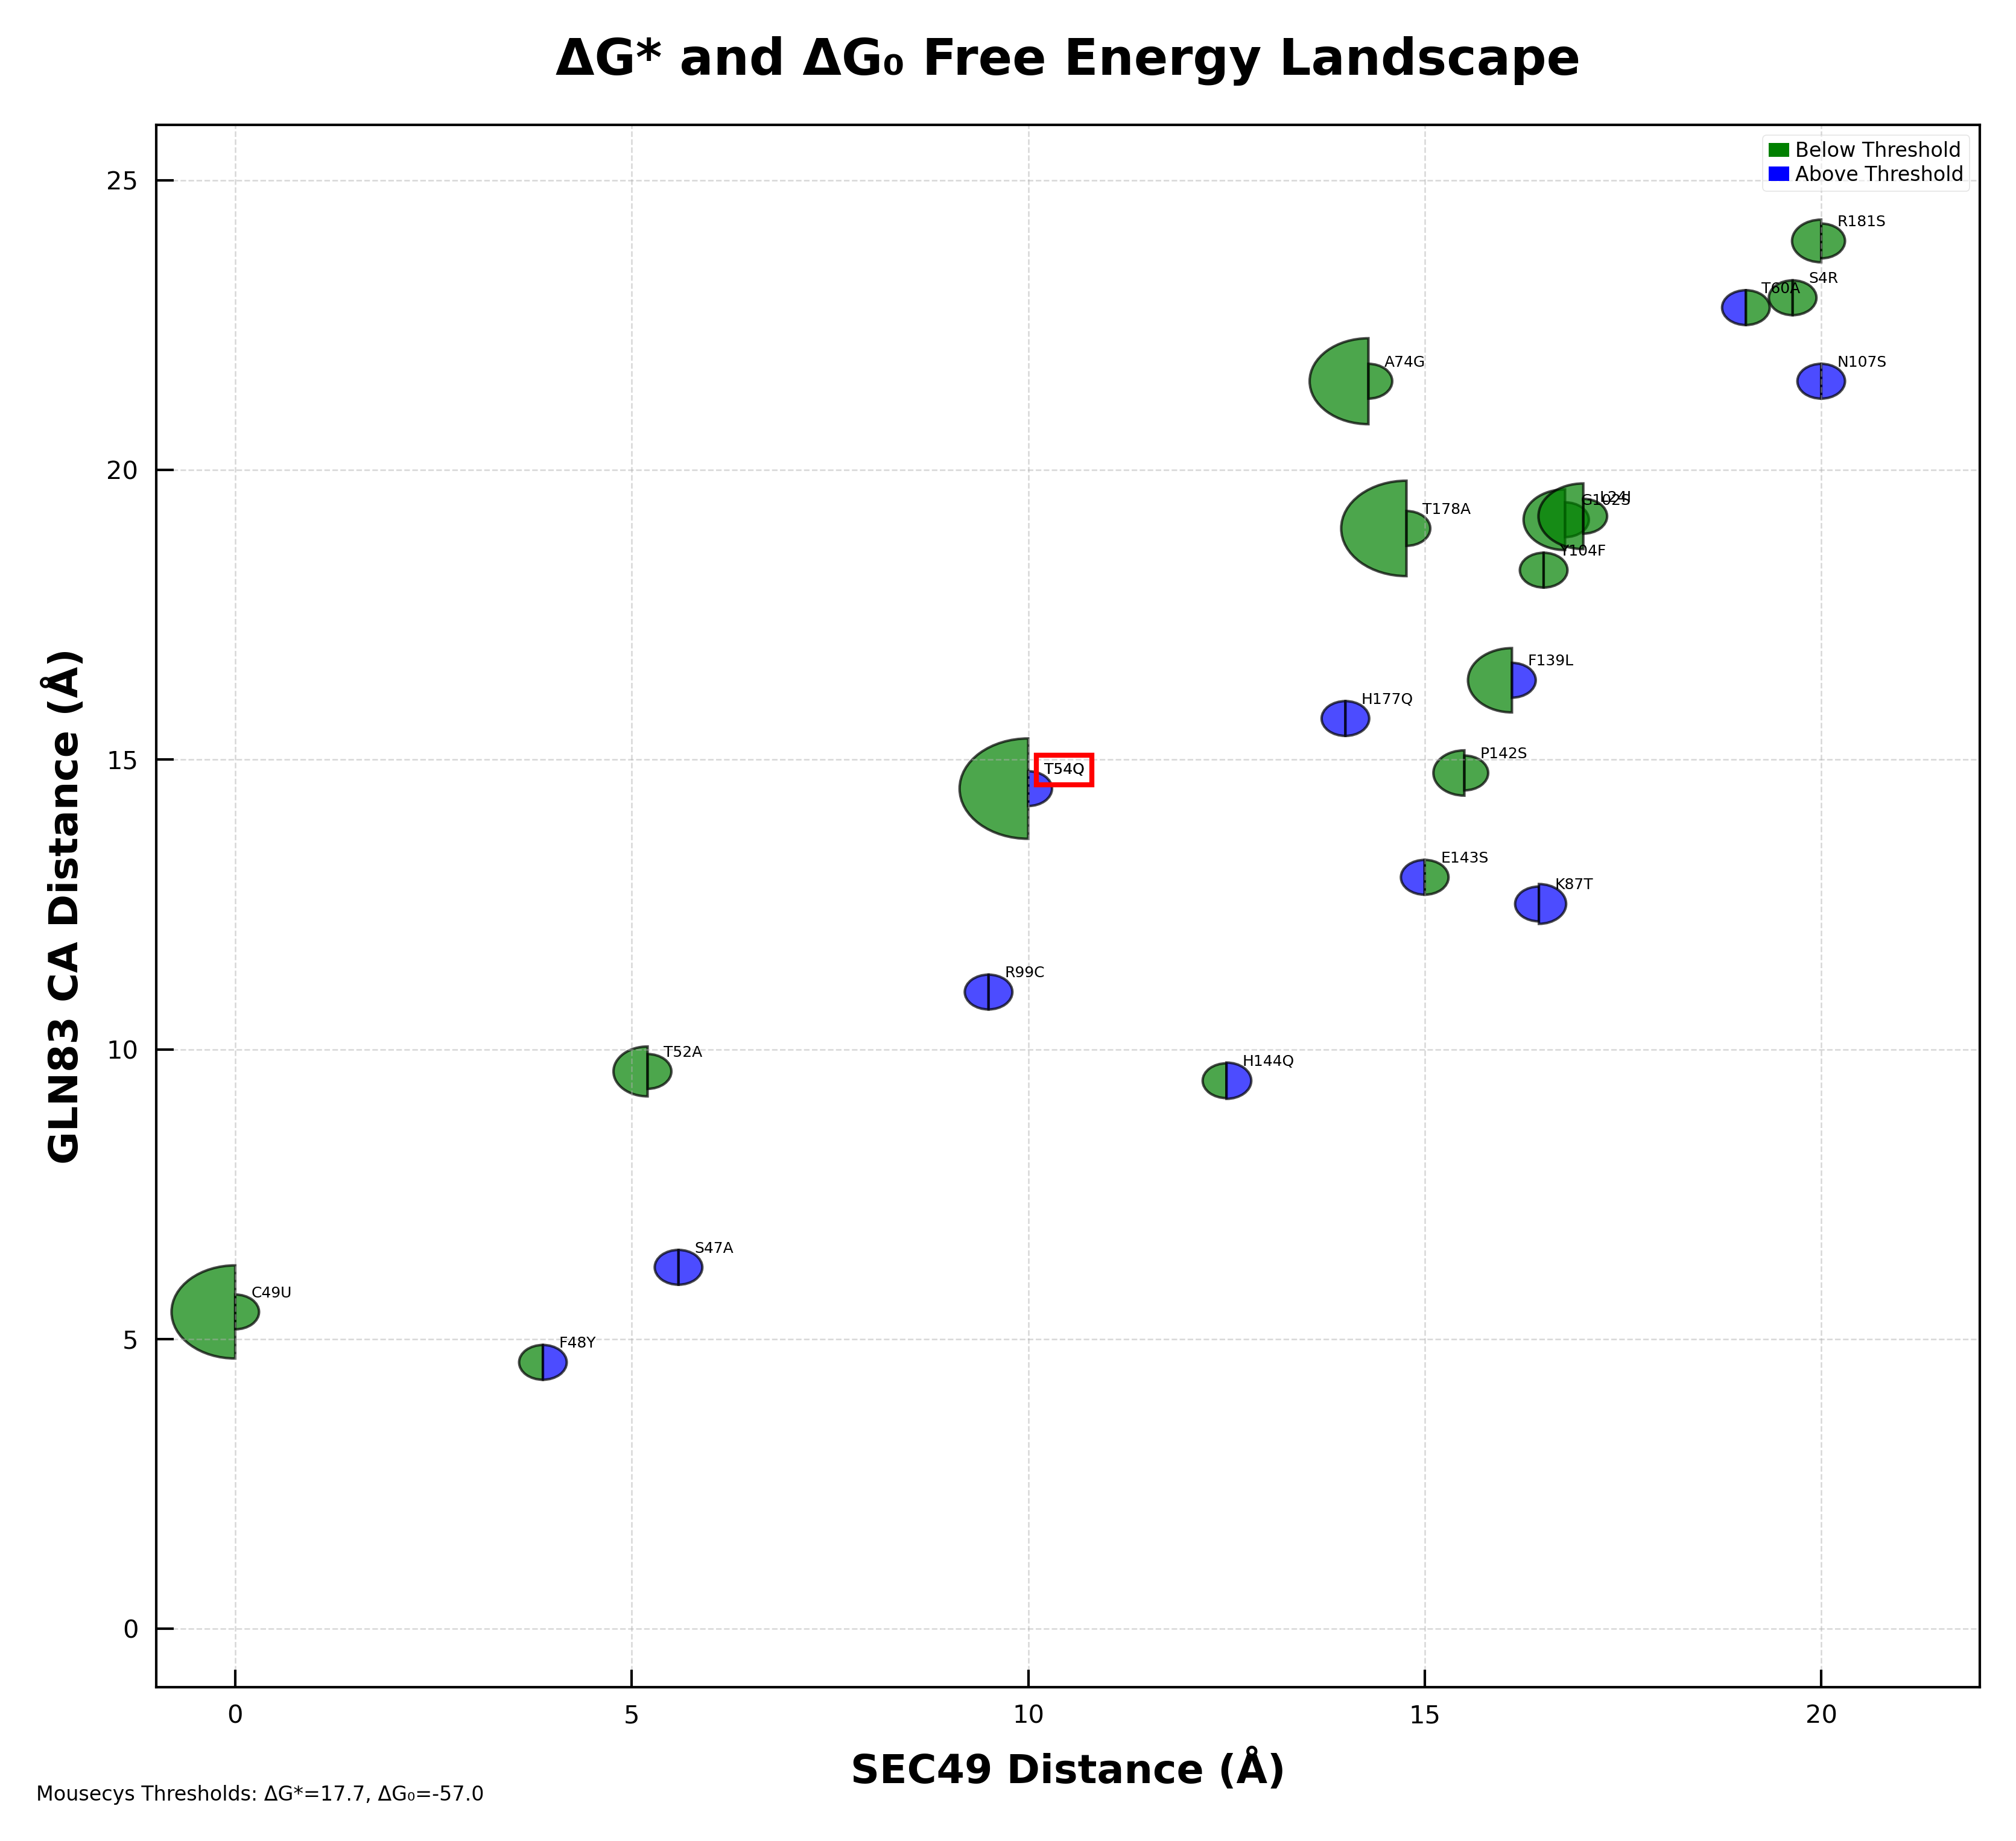

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import rcParams
import os

# Set publication-quality parameters with system font fallback
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans']
rcParams['font.size'] = 5
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Define save path
save_dir = "/home/hp/nayanika/github/GPX6/figures"
os.makedirs(save_dir, exist_ok=True)

# Define dataset with distances and free energy values (updated with your new data)
mutants = [
    {"name": "C49U", "sec49_distance": 0.0, "ca_distance": 5.47, "dg_star": 14.84, "dg0": -62.60},
    {"name": "F48Y", "sec49_distance": 3.88, "ca_distance": 4.60, "dg_star": 17.38, "dg0": -55.26},
    {"name": "T52A", "sec49_distance": 5.20, "ca_distance": 9.62, "dg_star": 16.16, "dg0": -61.77},
    {"name": "S47A", "sec49_distance": 5.59, "ca_distance": 6.24, "dg_star": 21.57, "dg0": -56.18},
    {"name": "R99C", "sec49_distance": 9.50, "ca_distance": 10.99, "dg_star": 24.29, "dg0": -55.41},
    {"name": "T54Q", "sec49_distance": 10.00, "ca_distance": 14.50, "dg_star": 14.62, "dg0": -55.68},
    {"name": "H177Q", "sec49_distance": 14.00, "ca_distance": 15.71, "dg_star": 18.66, "dg0": -55.40},
    {"name": "H144Q", "sec49_distance": 12.50, "ca_distance": 9.46, "dg_star": 17.66, "dg0": -53.40},
    {"name": "T178A", "sec49_distance": 14.77, "ca_distance": 18.99, "dg_star": 14.77, "dg0": -61.57},
    {"name": "A74G", "sec49_distance": 14.29, "ca_distance": 21.53, "dg_star": 15.06, "dg0": -60.08},
    {"name": "E143S", "sec49_distance": 15.00, "ca_distance": 12.97, "dg_star": 19.04, "dg0": -57.10},
    {"name": "F139L", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 15.72, "dg0": -54.00},
    {"name": "K87T", "sec49_distance": 16.44, "ca_distance": 12.51, "dg_star": 18.21, "dg0": -53.05},
    {"name": "P142S", "sec49_distance": 15.50, "ca_distance": 14.77, "dg_star": 16.30, "dg0": -59.56},
    {"name": "G102S", "sec49_distance": 16.77, "ca_distance": 19.14, "dg_star": 15.83, "dg0": -59.61},
    {"name": "Y104F", "sec49_distance": 16.50, "ca_distance": 18.27, "dg_star": 16.94, "dg0": -58.41},
    {"name": "L24I", "sec49_distance": 17.00, "ca_distance": 19.20, "dg_star": 15.68, "dg0": -60.30},
    {"name": "T60A", "sec49_distance": 19.05, "ca_distance": 22.80, "dg_star": 18.09, "dg0": -58.09},
    {"name": "R181S", "sec49_distance": 20.00, "ca_distance": 23.95, "dg_star": 16.38, "dg0": -60.55},
    {"name": "S4R", "sec49_distance": 19.64, "ca_distance": 22.97, "dg_star": 17.37, "dg0": -56.97},
    {"name": "N107S", "sec49_distance": 20.00, "ca_distance": 21.53, "dg_star": 20.05, "dg0": -56.09},
]

# Mousecys reference values (thresholds)
mousecys_dg_star = 17.68
mousecys_dg0 = -56.96

def size_normalization(dg_values, threshold, max_size=500, min_size=30):
    """
    Normalize the size of the circles based on the deviation from the threshold.
    If the dg_value is below the threshold, the circle size increases.
    If the dg_value is above the threshold, the circle size decreases.
    """
    normalized_sizes = []
    for value in dg_values:
        if value < threshold:  # Values below the threshold should have bigger circles
            size = (threshold - value) / (threshold - 0) * max_size  # Normalize to 100% size
        else:  # Values above the threshold should have smaller circles
            size = (threshold - value) / (threshold - 0) * max_size  # Normalize to 0% size
        normalized_sizes.append(np.clip(size, min_size, max_size))  # Clip the size between min_size and max_size
    return normalized_sizes

# Normalize the sizes for ΔG* and ΔG₀
dg_star_sizes = size_normalization(
    [mutant["dg_star"] for mutant in mutants], 
    threshold=mousecys_dg_star
)

dg0_sizes = size_normalization(
    [mutant["dg0"] for mutant in mutants], 
    threshold=mousecys_dg0
)

# Extract distances and labels for plotting
sec49_distances = [mutant["sec49_distance"] for mutant in mutants]
ca_distances = [mutant["ca_distance"] for mutant in mutants]
mutant_labels = [mutant["name"] for mutant in mutants]

# Create plot
fig, ax = plt.subplots(figsize=(5.5, 5.0), dpi=600)

for i, (x, y, dg_star_size, dg0_size) in enumerate(
    zip(sec49_distances, ca_distances, dg_star_sizes, dg0_sizes)
):
    # Determine color based on threshold
    color_dg_star = 'blue' if mutants[i]["dg_star"] > mousecys_dg_star else 'green'
    color_dg0 = 'blue' if mutants[i]["dg0"] > mousecys_dg0 else 'green'
    
    # ΔG* triangle (top-left and top-right)
    wedge_dg_star_left = mpatches.Wedge(
        center=(x, y), 
        r=dg_star_size / 100,  # Further reduced size
        theta1=90,   # Top-left
        theta2=270, 
        facecolor=color_dg_star, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    # ΔG₀ triangle (bottom-left and bottom-right)
    wedge_dg0_right = mpatches.Wedge(
        center=(x, y), 
        r=dg0_size / 100,  # Further reduced size
        theta1=270,  # Bottom-right
        theta2=90, 
        facecolor=color_dg0, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    ax.add_patch(wedge_dg_star_left)
    ax.add_patch(wedge_dg0_right)

# Labels & Titles
ax.set_xlabel("SEC49 Distance (Å)", fontsize=8, fontweight="bold")
ax.set_ylabel("GLN83 CA Distance (Å)", fontsize=8, fontweight="bold")
ax.set_title("ΔG* and ΔG₀ Free Energy Landscape", fontsize=10, fontweight="bold", pad=10)

# Adjust axis limits
ax.set_xlim(-1, max(sec49_distances) + 2)
ax.set_ylim(-1, max(ca_distances) + 2)

# Grid with subtle styling
ax.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

# Add text labels with a square box around "T54Q"
for sec_dist, ca_dist, label in zip(sec49_distances, ca_distances, mutant_labels):
    ax.text(
        sec_dist + 0.2, ca_dist + 0.2, label, fontsize=3, ha="left", va="bottom"
    )
    # Add a square box around T54Q
    if label == "T54Q":
        ax.text(
            sec_dist + 0.2, ca_dist + 0.2, label, fontsize=3, ha="left", va="bottom",
            bbox=dict(facecolor='none', edgecolor='red', linewidth=1, boxstyle='square,pad=0.5')
        )

# Compact legend
legend_patches = [
    mpatches.Patch(facecolor="green", label="Below Threshold", linewidth=0.3),  # Green for low values
    mpatches.Patch(facecolor="blue", label="Above Threshold", linewidth=0.3),  # Blue for high values
]

# Add a legend
leg = ax.legend(
    handles=legend_patches, 
    loc="upper right", 
    fontsize=4,
    frameon=True, 
    framealpha=0.5,
    handlelength=1.0,
    handletextpad=0.3,
    borderpad=0.3,
    labelspacing=0.2
)
leg.get_frame().set_linewidth(0.2)

# Add mousecys threshold annotation
threshold_text = f"Mousecys Thresholds: ΔG*={mousecys_dg_star:.1f}, ΔG₀={mousecys_dg0:.1f}"
plt.figtext(0.01, 0.01, threshold_text, fontsize=4, ha="left")

# Set aspect ratio
ax.set_aspect('auto')

# Tighter layout
plt.tight_layout()

# Save plot
png_path = os.path.join(save_dir, "Level0mouse.png")
plt.savefig(png_path, dpi=600, bbox_inches="tight", transparent=True)

print(f"Figure saved to: {png_path}")

plt.show()


Figure saved to: /home/hp/nayanika/github/GPX6/figures/Level1mouse.png


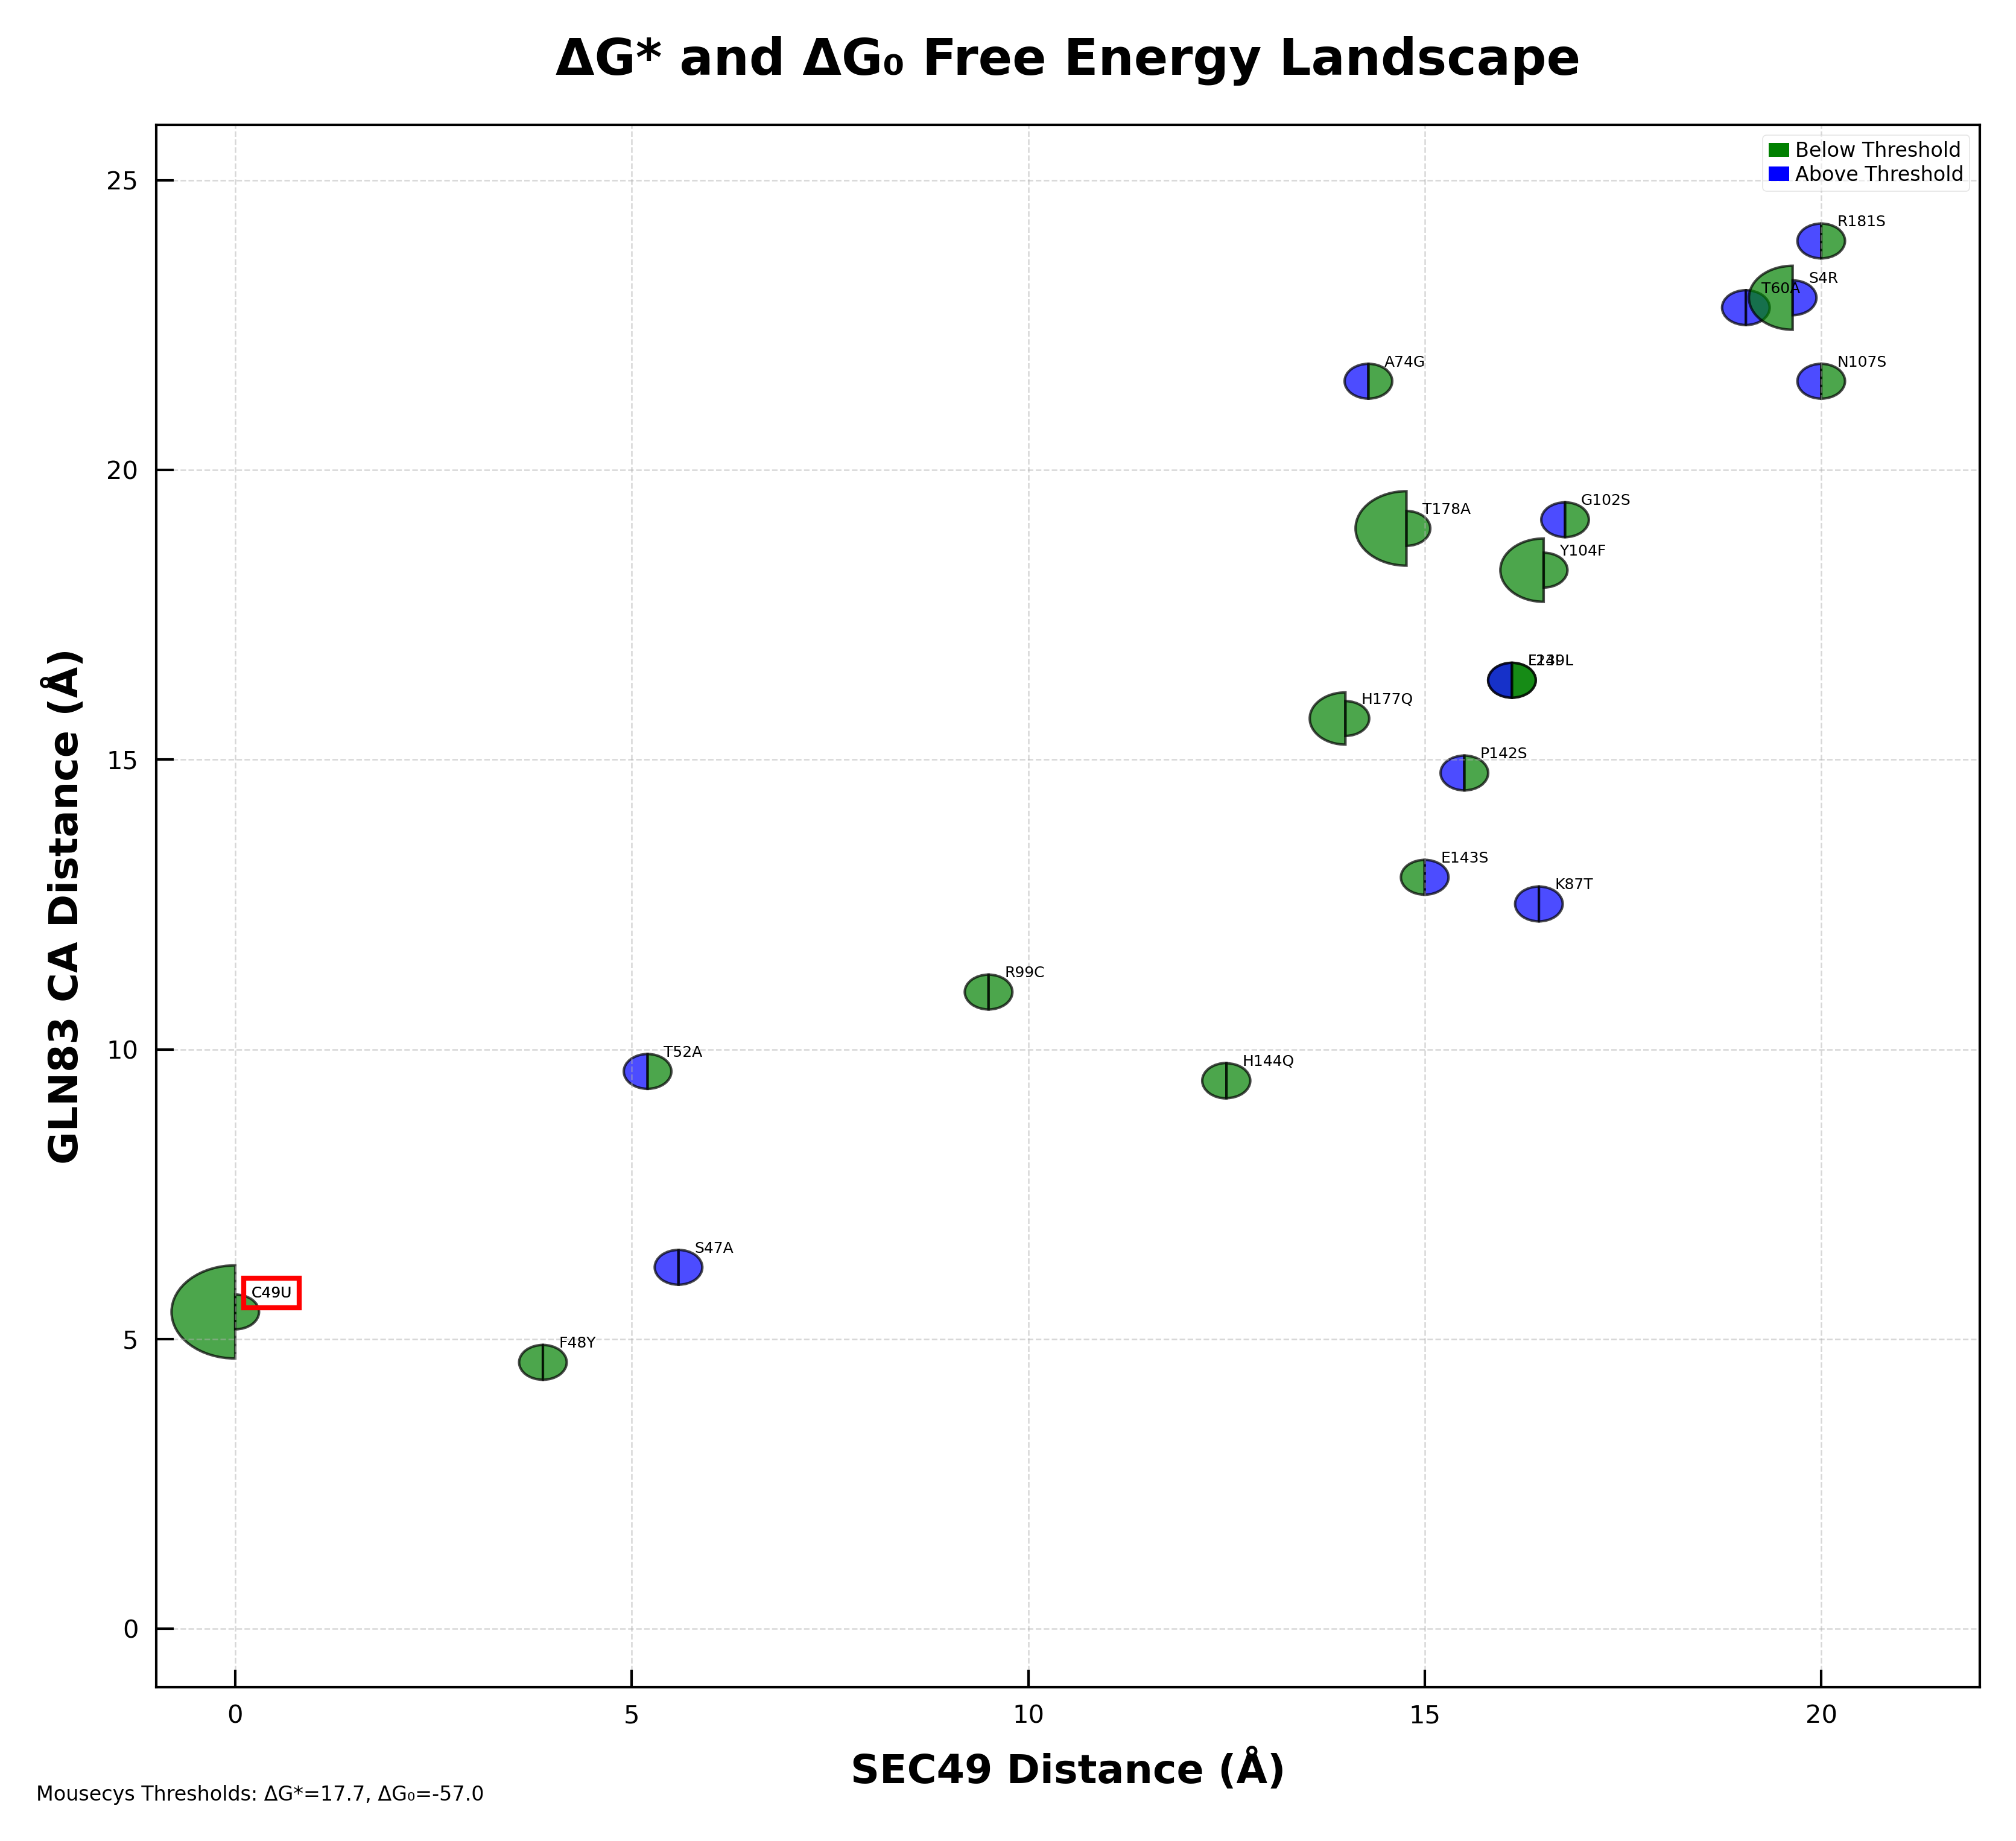

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import rcParams
import os

# Set publication-quality parameters with system font fallback
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans']
rcParams['font.size'] = 5
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Define save path
save_dir = "/home/hp/nayanika/github/GPX6/figures"
os.makedirs(save_dir, exist_ok=True)

# Define dataset with distances and free energy values (updated with your new data)
mutants = [
    {"name": "C49U", "sec49_distance": 0.0, "ca_distance": 5.47, "dg_star": 14.84, "dg0": -62.60},
    {"name": "F48Y", "sec49_distance": 3.88, "ca_distance": 4.60, "dg_star": 17.16, "dg0": -58.24},
    {"name": "T52A", "sec49_distance": 5.20, "ca_distance": 9.62, "dg_star": 17.83, "dg0": -57.60},
    {"name": "S47A", "sec49_distance": 5.59, "ca_distance": 6.24, "dg_star": 19.07, "dg0": -56.18},
    {"name": "R99C", "sec49_distance": 9.50, "ca_distance": 10.99, "dg_star": 17.29, "dg0": -59.41},
    {"name": "H177Q", "sec49_distance": 14.00, "ca_distance": 15.71, "dg_star": 16.09, "dg0": -60.31},
    {"name": "H144Q", "sec49_distance": 12.50, "ca_distance": 9.46, "dg_star": 16.60, "dg0": -59.10},
    {"name": "T178A", "sec49_distance": 14.77, "ca_distance": 18.99, "dg_star": 15.41, "dg0": -60.28},
    {"name": "A74G", "sec49_distance": 14.29, "ca_distance": 21.53, "dg_star": 17.88, "dg0": -57.70},
    {"name": "E143S", "sec49_distance": 15.00, "ca_distance": 12.97, "dg_star": 17.52, "dg0": -55.99},
    {"name": "F139L", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 17.01, "dg0": -58.28},
    {"name": "K87T", "sec49_distance": 16.44, "ca_distance": 12.51, "dg_star": 20.21, "dg0": -55.05},
    {"name": "P142S", "sec49_distance": 15.50, "ca_distance": 14.77, "dg_star": 18.30, "dg0": -59.56},
    {"name": "G102S", "sec49_distance": 16.77, "ca_distance": 19.14, "dg_star": 18.72, "dg0": -57.37},
    {"name": "Y104F", "sec49_distance": 16.50, "ca_distance": 18.27, "dg_star": 15.75, "dg0": -59.93},
    {"name": "L24I", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 17.88, "dg0": -57.70},
    {"name": "T60A", "sec49_distance": 19.05, "ca_distance": 22.80, "dg_star": 19.22, "dg0": -55.88},
    {"name": "R181S", "sec49_distance": 20.00, "ca_distance": 23.95, "dg_star": 19.38, "dg0": -62.55},
    {"name": "S4R", "sec49_distance": 19.64, "ca_distance": 22.97, "dg_star": 15.73, "dg0": -55.48},
    {"name": "N107S", "sec49_distance": 20.00, "ca_distance": 21.53, "dg_star": 21.25, "dg0": -58.09},
]

# Mousecys reference values (thresholds)
mousecys_dg_star = 17.68
mousecys_dg0 = -56.96

def size_normalization(dg_values, threshold, max_size=500, min_size=30):
    """
    Normalize the size of the circles based on the deviation from the threshold.
    If the dg_value is below the threshold, the circle size increases.
    If the dg_value is above the threshold, the circle size decreases.
    """
    normalized_sizes = []
    for value in dg_values:
        if value < threshold:  # Values below the threshold should have bigger circles
            size = (threshold - value) / (threshold - 0) * max_size  # Normalize to 100% size
        else:  # Values above the threshold should have smaller circles
            size = (threshold - value) / (threshold - 0) * max_size  # Normalize to 0% size
        normalized_sizes.append(np.clip(size, min_size, max_size))  # Clip the size between min_size and max_size
    return normalized_sizes

# Normalize the sizes for ΔG* and ΔG₀
dg_star_sizes = size_normalization(
    [mutant["dg_star"] for mutant in mutants], 
    threshold=mousecys_dg_star
)

dg0_sizes = size_normalization(
    [mutant["dg0"] for mutant in mutants], 
    threshold=mousecys_dg0
)

# Extract distances and labels for plotting
sec49_distances = [mutant["sec49_distance"] for mutant in mutants]
ca_distances = [mutant["ca_distance"] for mutant in mutants]
mutant_labels = [mutant["name"] for mutant in mutants]

# Create plot
fig, ax = plt.subplots(figsize=(5.5, 5.0), dpi=600)

for i, (x, y, dg_star_size, dg0_size) in enumerate(
    zip(sec49_distances, ca_distances, dg_star_sizes, dg0_sizes)
):
    # Determine color based on threshold
    color_dg_star = 'blue' if mutants[i]["dg_star"] > mousecys_dg_star else 'green'
    color_dg0 = 'blue' if mutants[i]["dg0"] > mousecys_dg0 else 'green'
    
    # ΔG* triangle (top-left and top-right)
    wedge_dg_star_left = mpatches.Wedge(
        center=(x, y), 
        r=dg_star_size / 100,  # Further reduced size
        theta1=90,   # Top-left
        theta2=270, 
        facecolor=color_dg_star, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    # ΔG₀ triangle (bottom-left and bottom-right)
    wedge_dg0_right = mpatches.Wedge(
        center=(x, y), 
        r=dg0_size / 100,  # Further reduced size
        theta1=270,  # Bottom-right
        theta2=90, 
        facecolor=color_dg0, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    ax.add_patch(wedge_dg_star_left)
    ax.add_patch(wedge_dg0_right)

# Labels & Titles
ax.set_xlabel("SEC49 Distance (Å)", fontsize=8, fontweight="bold")
ax.set_ylabel("GLN83 CA Distance (Å)", fontsize=8, fontweight="bold")
ax.set_title("ΔG* and ΔG₀ Free Energy Landscape", fontsize=10, fontweight="bold", pad=10)

# Adjust axis limits
ax.set_xlim(-1, max(sec49_distances) + 2)
ax.set_ylim(-1, max(ca_distances) + 2)

# Grid with subtle styling
ax.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

# Add text labels with a square box around "C49U"
for sec_dist, ca_dist, label in zip(sec49_distances, ca_distances, mutant_labels):
    ax.text(
        sec_dist + 0.2, ca_dist + 0.2, label, fontsize=3, ha="left", va="bottom"
    )
    # Add a square box around C49U
    if label == "C49U":
        ax.text(
            sec_dist + 0.2, ca_dist + 0.2, label, fontsize=3, ha="left", va="bottom",
            bbox=dict(facecolor='none', edgecolor='red', linewidth=1, boxstyle='square,pad=0.5')
        )

# Compact legend
legend_patches = [
    mpatches.Patch(facecolor="green", label="Below Threshold", linewidth=0.3),  # Green for low values
    mpatches.Patch(facecolor="blue", label="Above Threshold", linewidth=0.3),  # Blue for high values
]

# Add a legend
leg = ax.legend(
    handles=legend_patches, 
    loc="upper right", 
    fontsize=4,
    frameon=True, 
    framealpha=0.5,
    handlelength=1.0,
    handletextpad=0.3,
    borderpad=0.3,
    labelspacing=0.2
)
leg.get_frame().set_linewidth(0.2)

# Add mousecys threshold annotation
threshold_text = f"Mousecys Thresholds: ΔG*={mousecys_dg_star:.1f}, ΔG₀={mousecys_dg0:.1f}"
plt.figtext(0.01, 0.01, threshold_text, fontsize=4, ha="left")

# Set aspect ratio
ax.set_aspect('auto')

# Tighter layout
plt.tight_layout()

# Save plot
png_path = os.path.join(save_dir, "Level1mouse.png")
plt.savefig(png_path, dpi=600, bbox_inches="tight", transparent=True)

print(f"Figure saved to: {png_path}")

plt.show()
